Title : Linear regression by using Deep Neural network: Implement Boston housing price 
predictionproblem by Linear regression using Deep Neural network. Use Boston House price 
prediction dataset.

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#NumPy is a Python library used for working with arrays.
#It also has functions for working in domain of linear algebra, fourier transform, and matrices.
#Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [3]:
df = pd.read_csv("C:\\Users\\Atharv\\Downloads\\bostonr\\data.csv")

In [4]:
# read_csv use for read the csv file(boston)

In [5]:
df.head() #head is used to show only the first 5 rows of dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.shape  #shape is used to get no.of rows and columns in the dataset 

(506, 14)

In [7]:
df.describe()# gives all statistical values of the dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288641,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704525,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
x=df.drop("MEDV", axis =1) # contains all the columns except MEDV
y=df["MEDV"] # contains target variable i.e. MEDV

In [17]:
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [18]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Print the shapes of the training and testing sets 
print('Training set shape:', X_train.shape, y_train.shape) 
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Define the model architecture 
model =Sequential()
model.add(Dense(64,input_dim=13,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu')) 
model.add(Dense(1))
# Display the model summary 
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1207.5916 - mean_absolute_error: 29.4325 - val_loss: 557.2581 - val_mean_absolute_error: 22.7446
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 609.2252 - mean_absolute_error: 22.7604 - val_loss: 556.9172 - val_mean_absolute_error: 22.7370
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 631.1381 - mean_absolute_error: 23.3905 - val_loss: 556.5242 - val_mean_absolute_error: 22.7282
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 613.0176 - mean_absolute_error: 22.9483 - val_loss: 556.1196 - val_mean_absolute_error: 22.7191
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 628.2274 - mean_absolute_error: 22.8897 - val_loss: 555.7095 - val_mean_absolute_error: 22.7100
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 630.3044 - mean_absolute_error: 23.1875 - val_loss: 555.2943 - val_mean_absolute_error: 22.7006
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 627.4023 - mean_a

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 628.3587 - mean_absolute_error: 23.1285 - val_loss: 528.0290 - val_mean_absolute_error: 22.0809
Epoch 45/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 601.5166 - mean_absolute_error: 22.5315 - val_loss: 526.9028 - val_mean_absolute_error: 22.0549
Epoch 46/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 597.3243 - mean_absolute_error: 22.4838 - val_loss: 525.7542 - val_mean_absolute_error: 22.0284
Epoch 47/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 548.0469 - mean_absolute_error: 21.3916 - val_loss: 524.5997 - val_mean_absolute_error: 22.0017
Epoch 48/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 595.6323 - mean_absolute_error: 22.3075 - val_loss: 523.4095 - val_mean_absolute_error: 21.9741
Epoch 49/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 597.1525 - mean_absolute_error: 22.4330 - val_loss: 522.2048 - val_mean_absolute_error: 21.9462
Epoch 50/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 575.5542 - mean_absolute

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 611.3591 - mean_absolute_error: 22.4831 - val_loss: 466.0746 - val_mean_absolute_error: 20.6020
Epoch 88/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 541.7870 - mean_absolute_error: 21.1176 - val_loss: 464.3874 - val_mean_absolute_error: 20.5602
Epoch 89/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 523.5468 - mean_absolute_error: 20.9407 - val_loss: 462.6803 - val_mean_absolute_error: 20.5178
Epoch 90/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 489.9357 - mean_absolute_error: 19.9288 - val_loss: 460.9843 - val_mean_absolute_error: 20.4756
Epoch 91/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 528.6389 - mean_absolute_error: 21.0019 - val_loss: 459.2517 - val_mean_absolute_error: 20.4325
Epoch 92/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 498.7172 - mean_absolute_error: 20.2806 - val_loss: 457.5278 - val_mean_absolute_error: 20.3894
Epoch 93/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 521.8317 - mean_absolute

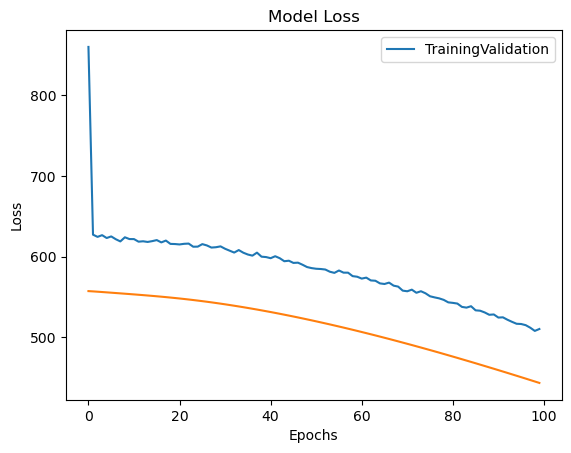

In [22]:
from keras.callbacks import EarlyStopping
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, 
callbacks=[early_stopping])
# Plot the training and validation loss over epochs import 
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training''Validation']) 
plt.show()

In [23]:
# Evaluate the model on the testing set loss,
mae = model.evaluate (X_test, y_test)
# Print the mean absolute error 
print('Mean Absolute Error:', mae)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 416.5768 - mean_absolute_error: 18.6391 
Mean Absolute Error: [423.4774475097656, 18.69566535949707]
